In [1]:
import pandas as pd
import numpy as np
from simpful import FuzzySystem, FuzzySet, LinguisticVariable, Triangular_MF, Gaussian_MF
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
data  = pd.DataFrame({
    'CuttingSpeed': [150,180,200,160,170,210,155,190,175,220],
    'FeedRate': [0.15,0.20,0.25,0.18,0.22,0.28,0.16,0.24,0.21,0.30],
    'Vibration': [10,12,15,11,14,18,10,16,13,20],
    'Temp': [45,55,60,48,58,65,46,62,54,70],
    'ToolWear': [0.12,0.18,0.25,0.15,0.20,0.30,0.13,0.23,0.18,0.35]
})

In [3]:
X = data[['CuttingSpeed', 'FeedRate', 'Vibration', 'Temp']].values
y = data['ToolWear'].values

In [4]:
FS = FuzzySystem()

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.12.0 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 https://github.com/aresio/simpful



In [5]:
# Cutting Speed
S_low = FuzzySet(function=Triangular_MF(140, 150, 170), term="Low")
S_med = FuzzySet(function=Triangular_MF(160, 180, 200), term="Medium")
S_high = FuzzySet(function=Triangular_MF(190, 210, 230), term="High")
FS.add_linguistic_variable("Speed", LinguisticVariable([S_low, S_med, S_high], concept="Cutting Speed", universe_of_discourse=[140, 230]))

In [6]:
# Feeding Rate
F_low  = FuzzySet(function=Triangular_MF(0.10,0.15,0.20), term="Low")
F_med  = FuzzySet(function=Triangular_MF(0.18,0.22,0.26), term="Medium")
F_high = FuzzySet(function=Triangular_MF(0.25,0.30,0.32), term="High")
FS.add_linguistic_variable("Feed", LinguisticVariable([F_low,F_med,F_high], universe_of_discourse=[0.1,0.32]))

In [7]:
# Vibration
V_low  = FuzzySet(function=Triangular_MF(8,10,12), term="Low")
V_med  = FuzzySet(function=Triangular_MF(11,14,17), term="Medium")
V_high = FuzzySet(function=Triangular_MF(16,18,21), term="High")
FS.add_linguistic_variable("Vibration", LinguisticVariable([V_low,V_med,V_high], concept="Vibration", universe_of_discourse=[8,21]))

In [8]:
# Temperature
T_low  = FuzzySet(function=Triangular_MF(40,45,50), term="Low")
T_med  = FuzzySet(function=Triangular_MF(50,55,60), term="Medium")
T_high = FuzzySet(function=Triangular_MF(60,65,75), term="High")
FS.add_linguistic_variable("Temp", LinguisticVariable([T_low,T_med,T_high], universe_of_discourse=[40,75]))

In [9]:
# Output (Tool Wear)
W_low  = FuzzySet(function=Triangular_MF(0.1,0.12,0.18), term="Low")
W_med  = FuzzySet(function=Triangular_MF(0.15,0.20,0.25), term="Medium")
W_high = FuzzySet(function=Triangular_MF(0.2,0.25,0.35), term="High")
FS.add_linguistic_variable("Wear", LinguisticVariable([W_low,W_med,W_high], universe_of_discourse=[0.1,0.35]))

Add Rules

In [10]:
rules = [
    # --- Speed & Feed interactions ---
    "IF (Speed IS Low) AND (Feed IS Low) THEN (Wear IS Low)",
    "IF (Speed IS Low) AND (Feed IS Medium) THEN (Wear IS Medium)",
    "IF (Speed IS Low) AND (Feed IS High) THEN (Wear IS Medium)",

    "IF (Speed IS Medium) AND (Feed IS Low) THEN (Wear IS Medium)",
    "IF (Speed IS Medium) AND (Feed IS Medium) THEN (Wear IS Medium)",
    "IF (Speed IS Medium) AND (Feed IS High) THEN (Wear IS High)",

    "IF (Speed IS High) AND (Feed IS Low) THEN (Wear IS Medium)",
    "IF (Speed IS High) AND (Feed IS Medium) THEN (Wear IS High)",
    "IF (Speed IS High) AND (Feed IS High) THEN (Wear IS High)",

    # --- Vibration effects ---
    "IF (Vibration IS High) THEN (Wear IS High)",
    "IF (Vibration IS Medium) THEN (Wear IS Medium)",
    "IF (Vibration IS Low) THEN (Wear IS Low)",

    # --- Temperature effects ---
    "IF (Temp IS High) THEN (Wear IS High)",
    "IF (Temp IS Medium) THEN (Wear IS Medium)",
    "IF (Temp IS Low) THEN (Wear IS Low)",

    # --- Combined conditions ---
    "IF (Vibration IS High) AND (Temp IS High) THEN (Wear IS High)",
    "IF (Vibration IS Medium) AND (Temp IS Medium) THEN (Wear IS Medium)",
    "IF (Vibration IS Low) AND (Temp IS Low) THEN (Wear IS Low)",

    "IF (Speed IS High) AND (Temp IS High) THEN (Wear IS High)",
    "IF (Feed IS High) AND (Vibration IS High) THEN (Wear IS High)",
    "IF (Speed IS Medium) AND (Temp IS Medium) THEN (Wear IS Medium)",
    "IF (Speed IS Low) AND (Temp IS Low) THEN (Wear IS Low)",
]

FS.add_rules(rules)

Evaluate from each data point

In [11]:
predictions = []

for i in range(len(X)):
    FS.set_variable("Speed", X[i,0])
    FS.set_variable("Feed", X[i,1])
    FS.set_variable("Vibration", X[i,2])
    FS.set_variable("Temp", X[i,3])
    result = FS.inference()["Wear"]
    predictions.append(result)

data["Predicted"] = predictions
print(data)

   CuttingSpeed  FeedRate  Vibration  Temp  ToolWear  Predicted
0           150      0.15         10    45      0.12   0.133334
1           180      0.20         12    55      0.18   0.200000
2           200      0.25         15    60      0.25   0.231362
3           160      0.18         11    48      0.15   0.135556
4           170      0.22         14    58      0.20   0.200000
5           210      0.28         18    65      0.30   0.266667
6           155      0.16         10    46      0.13   0.133334
7           190      0.24         16    62      0.23   0.241905
8           175      0.21         13    54      0.18   0.200000
9           220      0.30         20    70      0.35   0.269444


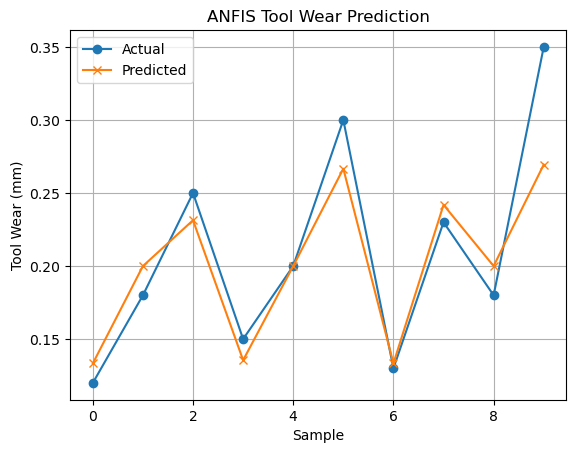

In [12]:
plt.plot(y, label="Actual", marker='o')
plt.plot(predictions, label="Predicted", marker='x')
plt.title("ANFIS Tool Wear Prediction")
plt.xlabel("Sample")
plt.ylabel("Tool Wear (mm)")
plt.legend()
plt.grid(True)
plt.show()

Error Calculations

In [13]:
mae = mean_absolute_error(y, predictions)
mse = mean_squared_error(y, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y, predictions)

# Percentage accuracy (based on relative MAE)
accuracy = 100 * (1 - (mae / np.mean(y)))

# Display metrics
print("🔹 Model Performance Metrics:")
print(f"MAE  = {mae:.4f}")
print(f"MSE  = {mse:.4f}")
print(f"RMSE = {rmse:.4f}")
print(f"R²   = {r2:.4f}")
print(f"Accuracy = {accuracy:.2f}%")

🔹 Model Performance Metrics:
MAE  = 0.0216
MSE  = 0.0009
RMSE = 0.0305
R²   = 0.8131
Accuracy = 89.69%


Display Real vs Predicted

In [14]:
print("\nReal vs Predicted Tool Wear:")
print(data[['ToolWear','Predicted']])


Real vs Predicted Tool Wear:
   ToolWear  Predicted
0      0.12   0.133334
1      0.18   0.200000
2      0.25   0.231362
3      0.15   0.135556
4      0.20   0.200000
5      0.30   0.266667
6      0.13   0.133334
7      0.23   0.241905
8      0.18   0.200000
9      0.35   0.269444
